In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from data_processing import generate_data
from polyaxon_experiement import create_experiment
from polyaxon.processing.input_fn import numpy_input_fn

tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
TIMESTEPS = 7
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)
xp = create_experiment('/tmp/polyaxon_logs/sin', X, y)

INFO:tensorflow:Using config: {'_save_checkpoints_steps': 100, '_task_type': None, '_task_id': 0, '_num_ps_replicas': 0, '_tf_random_seed': 1, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_max': 5, '_environment': 'local', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x112ec98d0>, '_save_summary_steps': 100, '_is_chief': True, '_session_config': None, '_model_dir': None, '_save_checkpoints_secs': None, '_master': '', '_keep_checkpoint_every_n_hours': 4, '_num_worker_replicas': 0, '_evaluation_master': ''}


In [3]:
xp.continuous_train_and_evaluate()

INFO:tensorflow:Training model for 100 steps
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/polyaxon_logs/sin/model.ckpt.
INFO:tensorflow:loss = 0.16403, step = 1
INFO:tensorflow:Saving checkpoints for 100 into /tmp/polyaxon_logs/sin/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00252027.
INFO:tensorflow:Evaluating model now.
INFO:tensorflow:Starting evaluation at 2017-06-15-15:59:14
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin/model.ckpt-100
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2017-06-15-15:59:15
INFO:tensorflow:Saving dict for global step 100: global_step = 100, loss = 0.003

INFO:tensorflow:Finished evaluation at 2017-06-15-15:59:58
INFO:tensorflow:Saving dict for global step 500: global_step = 500, loss = 8.96396e-05, streaming_mean_absolute_error = 0.00771438, streaming_root_mean_squared_error = 0.00946782
INFO:tensorflow:Training model for 100 steps
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin/model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into /tmp/polyaxon_logs/sin/model.ckpt.
INFO:tensorflow:loss = 1.15566e-05, step = 501
INFO:tensorflow:Saving checkpoints for 600 into /tmp/polyaxon_logs/sin/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00338809.
INFO:tensorflow:Evaluating model now.
INFO:tensorflow:Starting evaluation at 2017-06-15-16:00:08
INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin/model.ckpt-600
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Ev

INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2017-06-15-16:00:48
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.000126559, streaming_mean_absolute_error = 0.0104135, streaming_root_mean_squared_error = 0.0112498
INFO:tensorflow:Stop training model as max steps reached


({'global_step': 1000,
  'loss': 0.00012655852,
  'streaming_mean_absolute_error': 0.010413513,
  'streaming_root_mean_squared_error': 0.011249823},
 [])

In [12]:
predicted = [i['results'] for i in xp.estimator.predict(numpy_input_fn({'x': X['test']}, shuffle=False))]
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

INFO:tensorflow:Restoring parameters from /tmp/polyaxon_logs/sin/model.ckpt-1000
MSE: 0.001129


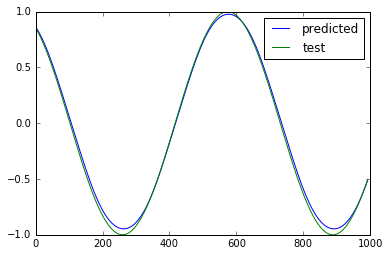

In [13]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])